In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


# Data Pipeline

 ## Coding tutorials
 #### [1. Keras datasets](#coding_tutorial_1)
 #### [2. Dataset generators](#coding_tutorial_2)
 #### [3. Keras image data augmentation](#coding_tutorial_3)
 #### [4. The Dataset class](#coding_tutorial_4)
 #### [5. Training with Datasets](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Keras datasets

For a list of Keras datasets and documentation on recommended usage, see [this link](https://keras.io/datasets/).

In [2]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the CIFAR-100 Dataset

In [3]:
from tensorflow.keras.datasets import cifar100

In [4]:
# Load the CIFAR-100 dataset

(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode="fine")
(_, y_train_sec), (_, y_test_sec) = cifar100.load_data(label_mode="coarse")

169009152/169001437 [==============================] - 4s 0us/step


In [5]:
# Confirm that reloading the dataset does not require a download

(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode="fine")

#### Examine the Dataset

In [6]:
# Examine the shape of the data.

print("Train Images Shape: {}".format(x_train.shape))
print("Train Labels Shape: {}".format(y_train.shape))
print("Secondary Train Labels Shape: {}".format(y_train_sec.shape))

Train Images Shape: (50000, 32, 32, 3)
Train Labels Shape: (50000, 1)
Secondary Train Labels Shape: (50000, 1)


In [7]:
# Examine the shape of the data.

print("Test Images Shape: {}".format(x_test.shape))
print("Test Labels Shape: {}".format(y_test.shape))
print("Secondary Test Labels Shape: {}".format(y_train_sec.shape))

Test Images Shape: (10000, 32, 32, 3)
Test Labels Shape: (10000, 1)
Secondary Test Labels Shape: (50000, 1)


#### Import the data

The additional files required for this tutorial can be downloaded from the following link:

cifar100_fine_labels: https://drive.google.com/open?id=1WFW1cj8v_5z1pGvq6htQyFUPrJP-Z2v5

cifar100_coarse_labels: https://drive.google.com/open?id=1Jmt7o-6sP85D7iRORk5tJqJMN3wCP12p

You should store these files in Drive for use in this Colab notebook.

In [8]:
# Run this cell to download the files

from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1WFW1cj8v_5z1pGvq6htQyFUPrJP-Z2v5',
                                    dest_path='/content/cifar100_fine_labels.json',
                                    unzip=False)

gdd.download_file_from_google_drive(file_id='1Jmt7o-6sP85D7iRORk5tJqJMN3wCP12p',
                                    dest_path='/content/cifar100_coarse_labels.json',
                                    unzip=False)

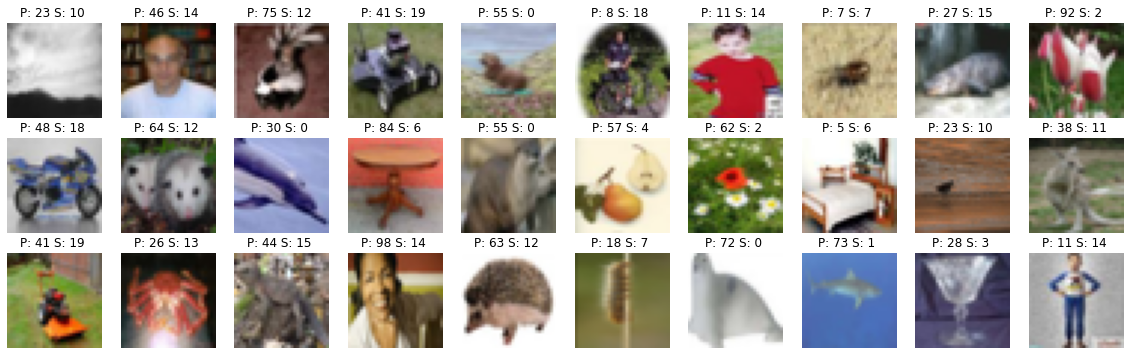

In [9]:
# Examine one of the images and its corresponding label

plt.rcParams["figure.figsize"] = 20,6
for x in range(30):
    plt.subplot(3, 10, x+1)
    idx = np.random.randint(0, x_train.shape[0])
    plt.imshow(x_train[idx])
    plt.title("P: {} S: {} ".format(y_train[idx,0], y_train_sec[idx,0]))
    plt.axis("off")

plt.show()

In [10]:
# Load the list of labels from a JSON file

import json

with open('/content/cifar100_fine_labels.json', 'r') as fine_labels:
    cifar100_fine_labels = json.load(fine_labels)
    fine_labels.close()

with open('/content/cifar100_coarse_labels.json', 'r') as coarse_labels:
    cifar100_coarse_labels = json.load(coarse_labels)
    coarse_labels.close()

The list of labels for the CIFAR-100 dataset are available [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In [11]:
# Print a few of the labels

print(cifar100_fine_labels[:10])
print(cifar100_coarse_labels[:10])

['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle']
['aquatic mammals', 'fish', 'flowers', 'food containers', 'fruit and vegetables', 'household electrical device', 'household furniture', 'insects', 'large carnivores', 'large man-made outdoor things']


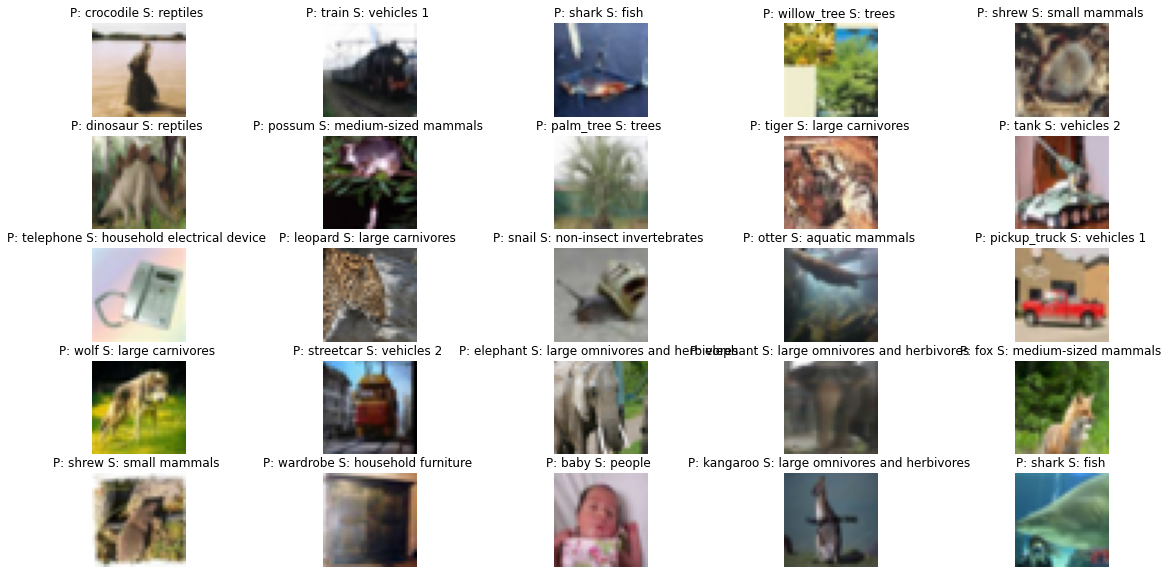

In [12]:
# Print the corresponding label for the example above

plt.rcParams["figure.figsize"] = 20, 10
for x in range(25):
    plt.subplot(5, 5, x+1)
    idx = np.random.randint(0, x_train.shape[0])
    plt.imshow(x_train[idx])
    plt.title("P: {} S: {} ".format(cifar100_fine_labels[y_train[idx, 0]], cifar100_coarse_labels[y_train_sec[idx, 0]]))
    plt.axis("off")

plt.show()

#### Load the IMDB Dataset

In [13]:
from tensorflow.keras.datasets import imdb

In [14]:
# Load the IMDB dataset

(x_train, y_train), (x_test, y_test) = imdb.load_data()

17465344/17464789 [==============================] - 0s 0us/step


In [15]:
# Examine the shape of the data.

print("Train Data Shape: {}".format(x_train.shape))
print("Train Labels Shape: {}".format(y_train.shape))

Train Data Shape: (25000,)
Train Labels Shape: (25000,)


In [16]:
# Examine the shape of the data.

print("Test Data Shape: {}".format(x_train.shape))
print("Test Labels Shape: {}".format(y_train.shape))

Test Data Shape: (25000,)
Test Labels Shape: (25000,)


In [17]:
# Print an example from the training dataset, along with its corresponding label

idx = np.random.randint(0, x_train.shape[0])
print("Data: ", x_train[idx])
print("Label: ", y_train[idx])

Data:  [1, 14, 22, 1077, 32, 498, 313, 1807, 550, 1062, 196, 5814, 665, 3722, 1166, 7, 807, 8, 353, 8, 2421, 4, 192, 15, 50, 66, 9, 164, 290, 149, 133, 50, 9, 57, 114, 8, 1128, 7, 4, 105, 26, 4734, 668, 485, 42, 1591, 61591, 109, 5, 36, 81, 24, 126, 740, 8, 257, 85, 44, 233, 15, 3277, 68, 247, 11724, 456, 4, 22, 9, 4012, 187, 6, 255, 37, 659, 46, 44, 41, 5308, 8584, 305, 7, 9453, 90, 59, 320, 18335, 304, 1060, 34, 8000, 8584, 765, 103, 6, 548, 5, 6, 12249, 19, 41, 799, 37, 697, 44, 4, 8584, 209, 979, 41, 59, 1643, 41, 658, 8, 570, 4192, 23, 41, 36, 306, 8, 30, 796, 2351, 17, 6, 223, 107, 85, 65, 411, 4, 4261, 847, 7, 4, 3219, 3715, 336, 19, 27, 185, 322, 8, 25038, 5, 4, 8239, 19, 4, 3219, 799, 81, 24, 1464, 101, 221, 8769, 4, 1720, 7, 6, 7698, 7, 4, 255, 15, 186, 8, 270, 125, 687, 11, 4, 22, 9, 24, 6, 875, 11, 410, 18, 3349, 42, 101, 85, 291, 18, 15, 551, 14, 9, 24, 195, 8, 97, 35, 221, 22, 10, 10, 5359, 51, 117, 4361, 18, 905, 943, 50, 26, 11, 4, 229, 26, 24, 343, 42, 26, 11111, 4248,

In [18]:
# Get the lengths of the input sequences

sequence_lengths = [len(seq) for seq in x_train]

In [19]:
# Determine the maximum and minimum sequence length

{"Minimum Length": min(sequence_lengths), 
 "Maximum Length": max(sequence_lengths)}

{'Maximum Length': 2494, 'Minimum Length': 11}

#### Using Keyword Arguments

In [20]:
# Load the data ignoring the 50 most frequent words, use oov_char=2 (this is the default)

(x_train, y_train), (x_test, y_test) = imdb.load_data(skip_top=50, oov_char=2)

In [21]:
# Get the lengths of the input sequences

sequence_lengths = [len(seq) for seq in x_train]

In [22]:
# Determine the maximum and minimum sequence length

{"Minimum Length": min(sequence_lengths), 
 "Maximum Length": max(sequence_lengths)}

{'Maximum Length': 2494, 'Minimum Length': 11}

In [23]:
# Define functions for filtering the sequences

def remove_oov_char(element):
    ''' Filter function for removing the oov_char. '''
    return [word for word in element if word!=2]

def filter_list(lst):
    ''' Run remove_oov_char on elements in a list. '''
    return [remove_oov_char(element) for element in lst]

In [24]:
# Remove the oov_char from the sequences using the filter_list function

x_train = filter_list(x_train)

In [25]:
# Get the lengths of the input sequences

sequence_lengths = [len(seq) for seq in x_train]

In [26]:
# Determine the maximum and minimum sequence length

{"Minimum Length": min(sequence_lengths), 
 "Maximum Length": max(sequence_lengths)}

{'Maximum Length': 1648, 'Minimum Length': 3}

***
<a id="coding_tutorial_2"></a>
## Dataset generators

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the UCI Fertility Dataset

We will be using a dataset available at https://archive.ics.uci.edu/ml/datasets/Fertility from UC Irvine.

#### Import the data

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=1OA0lwa5YLDs1njS377jbqPpMSlH5TzQV

You should store this file in Drive for use in this Colab notebook.

In [28]:
# Run this cell to downlaod the data

gdd.download_file_from_google_drive(file_id='1OA0lwa5YLDs1njS377jbqPpMSlH5TzQV',
                                    dest_path='/content/fertility_Diagnosis.txt',
                                    unzip=False)

In [29]:
# Load the fertility dataset

headers = ['Season', 'Age', 'Diseases', 'Trauma', 'Surgery', 'Fever', 'Alcohol', 'Smoking', 'Sitting', 'Output']
fertility = pd.read_csv('/content/fertility_Diagnosis.txt', delimiter=',', header=None, names=headers)

In [30]:
# Print the shape of the DataFrame

fertility.shape

(100, 10)

In [31]:
# Show the head of the DataFrame

fertility.head()

,Season,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


#### Process the data

In [32]:
# Map the 'Output' feature from 'N' to 0 and from 'O' to 1

fertility['Output'] = fertility['Output'].map(lambda x : 0.0 if x=='N' else 1.0)

In [33]:
# Show the head of the DataFrame

fertility.head()

,Season,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0.0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,1.0
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0.0
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,0.0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1.0


In [34]:
# Convert the DataFrame so that the features are mapped to floats

fertility = fertility.astype('float32')

In [35]:
# Shuffle the DataFrame

fertility = fertility.sample(frac=1).reset_index(drop=True)

In [36]:
# Show the head of the DataFrame

fertility.head()

,Season,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output
0,1.00,0.78,1.0,1.0,1.0,0.0,0.6,0.0,0.13,0.0
1,-0.33,0.75,0.0,1.0,1.0,0.0,1.0,-1.0,0.38,0.0
2,-1.00,0.78,1.0,1.0,0.0,1.0,0.6,-1.0,0.38,0.0
3,-1.00,0.56,1.0,0.0,0.0,0.0,1.0,-1.0,0.44,0.0
4,1.00,0.75,1.0,1.0,1.0,0.0,0.8,1.0,0.25,0.0


In [37]:
# Convert the field Season to a one-hot encoded vector

fertility = pd.get_dummies(fertility, prefix='Season', columns=['Season'])

In [38]:
# Show the head of the DataFrame

fertility.head()

,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output,Season_-1.0,Season_-0.33000001311302185,Season_0.33000001311302185,Season_1.0
0,0.78,1.0,1.0,1.0,0.0,0.6,0.0,0.13,0.0,0,0,0,1
1,0.75,0.0,1.0,1.0,0.0,1.0,-1.0,0.38,0.0,0,1,0,0
2,0.78,1.0,1.0,0.0,1.0,0.6,-1.0,0.38,0.0,1,0,0,0
3,0.56,1.0,0.0,0.0,0.0,1.0,-1.0,0.44,0.0,1,0,0,0
4,0.75,1.0,1.0,1.0,0.0,0.8,1.0,0.25,0.0,0,0,0,1


In [39]:
# Move the Output column such that it is the last column in the DataFrame

fertility.columns = [col for col in fertility.columns if col != 'Output'] + ['Output']

In [40]:
# Show the head of the DataFrame

fertility.head()

,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Season_-1.0,Season_-0.33000001311302185,Season_0.33000001311302185,Season_1.0,Output
0,0.78,1.0,1.0,1.0,0.0,0.6,0.0,0.13,0.0,0,0,0,1
1,0.75,0.0,1.0,1.0,0.0,1.0,-1.0,0.38,0.0,0,1,0,0
2,0.78,1.0,1.0,0.0,1.0,0.6,-1.0,0.38,0.0,1,0,0,0
3,0.56,1.0,0.0,0.0,0.0,1.0,-1.0,0.44,0.0,1,0,0,0
4,0.75,1.0,1.0,1.0,0.0,0.8,1.0,0.25,0.0,0,0,0,1


In [41]:
# Convert the DataFrame to a numpy array.

fertility = fertility.to_numpy()

#### Split the Data

In [42]:
# Split the dataset into training and validation set

training = fertility[0:70]
validation = fertility[70:100]

In [43]:
# Verify the shape of the training data

assert training.shape == (70, 13)

In [44]:
# Separate the features and labels for the validation and training data

training_features = training[:,0:-1]
training_labels = training[:,-1]
validation_features = validation[:,0:-1]
validation_labels = validation[:,-1]

#### Create the Generator

In [45]:
# Create a function that returns a generator producing inputs and labels

def get_generator(features, labels, batch_size=1):
    for n in range(int(len(features)/batch_size)):
        yield (features[n*batch_size: (n+1)*batch_size], labels[n*batch_size: (n+1)*batch_size])

In [46]:
# Apply the function to our training features and labels with a batch size of 10

train_generator = get_generator(training_features, training_labels, batch_size=10)

In [47]:
# Test the generator using the next() function

next(train_generator)

(array([[ 0.78,  1.  ,  1.  ,  1.  ,  0.  ,  0.6 ,  0.  ,  0.13,  0.  ,
          0.  ,  0.  ,  0.  ],
        [ 0.75,  0.  ,  1.  ,  1.  ,  0.  ,  1.  , -1.  ,  0.38,  0.  ,
          0.  ,  1.  ,  0.  ],
        [ 0.78,  1.  ,  1.  ,  0.  ,  1.  ,  0.6 , -1.  ,  0.38,  0.  ,
          1.  ,  0.  ,  0.  ],
        [ 0.56,  1.  ,  0.  ,  0.  ,  0.  ,  1.  , -1.  ,  0.44,  0.  ,
          1.  ,  0.  ,  0.  ],
        [ 0.75,  1.  ,  1.  ,  1.  ,  0.  ,  0.8 ,  1.  ,  0.25,  0.  ,
          0.  ,  0.  ,  0.  ],
        [ 0.75,  1.  ,  1.  ,  0.  ,  0.  ,  0.8 , -1.  ,  0.38,  0.  ,
          0.  ,  0.  ,  1.  ],
        [ 0.67,  1.  ,  0.  ,  1.  ,  0.  ,  0.6 , -1.  ,  0.38,  1.  ,
          0.  ,  0.  ,  0.  ],
        [ 0.75,  1.  ,  0.  ,  1.  ,  0.  ,  0.8 , -1.  ,  0.44,  1.  ,
          0.  ,  0.  ,  1.  ],
        [ 0.53,  1.  ,  1.  ,  0.  ,  1.  ,  1.  , -1.  ,  0.75,  0.  ,
          0.  ,  1.  ,  0.  ],
        [ 0.56,  1.  ,  0.  ,  0.  ,  0.  ,  1.  , -1.  ,  0.63,  0.  ,
 

#### Build the model

In [48]:
# Create a model using Keras with 3 layers

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input, BatchNormalization

input_shape = (12,)
output_shape = (1,)

def get_model(input_shape):
    model_input = Input(input_shape)
    batch_1 = BatchNormalization(momentum=0.8)(model_input)
    dense_1 = Dense(100, activation='relu')(batch_1)
    batch_2 = BatchNormalization(momentum=0.8)(dense_1)
    output = Dense(1, activation='sigmoid')(batch_2)

    model = Model([model_input], output)

    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [49]:
# Display the model summary to show the resultant structure

model = get_model(input_shape)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 12)                48        
_________________________________________________________________
dense (Dense)                (None, 100)               1300      
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 1,849
Trainable params: 1,625
Non-trainable params: 224
_________________________________________________________________


#### Train and evaluate the model using the generator

In [50]:
# Calculate the number of training steps per epoch for the given batch size.

batch_size = 5
train_steps = len(training) // batch_size

valid_batch_size = 30
valid_steps = len(validation) // valid_batch_size

In [51]:
# Set the epochs to 3

epochs = 3

In [52]:
# Train the model

for epoch in range(epochs):
    train_generator = get_generator(training_features, training_labels, batch_size=batch_size)
    valid_generator = get_generator(validation_features, validation_labels, batch_size=valid_batch_size)

    print("Epoch: {:02d}".format(epoch+1), end="   ")
    model.fit(train_generator, 
              steps_per_epoch=train_steps, 
              validation_data=valid_generator, 
              validation_steps=valid_steps, 
              verbose=2)

Epoch: 01   14/14 - 0s - loss: 0.4565 - accuracy: 0.7857 - val_loss: 0.1311 - val_accuracy: 1.0000
Epoch: 02   14/14 - 0s - loss: 0.0681 - accuracy: 0.9857 - val_loss: 0.0083 - val_accuracy: 1.0000
Epoch: 03   14/14 - 0s - loss: 0.0215 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 1.0000


In [53]:
# Try to run the fit_generator function once more; observe what happens

model.fit_generator(train_generator, steps_per_epoch=train_steps)

Instructions for updating:
Please use Model.fit, which supports generators.


StopIteration: ignored

#### Make an Infinitely Looping Cyclic Generator

In [ ]:
# Create a function that returns an infinitely looping generator

def get_generator_cyclic(features, labels, batch_size=1):
    while True:
      for n in range(int(len(features)/batch_size)):
        yield (features[n*batch_size: (n+1)*batch_size], labels[n*batch_size: (n+1)*batch_size])
      permutation = np.random.permutation(len(features))
      features = features[permutation]
      labels = labels[permutation]

In [ ]:
# Create a generator using this function.

train_generator_cyclic = get_generator_cyclic(training_features, training_labels, batch_size=batch_size)

In [ ]:
# Assert that the new cyclic generator does not raise a StopIteration

for i in range(2*train_steps):
    next(train_generator_cyclic)

In [ ]:
# Generate a cyclic validation generator

validation_generator_cyclic = get_generator_cyclic(validation_features, validation_labels, batch_size=valid_batch_size)

In [ ]:
# Get a new model

model = get_model(input_shape)

In [ ]:
# Train the model

for epoch in range(2*epochs):
    train_generator_cyclic = get_generator_cyclic(training_features, training_labels, batch_size=batch_size)
    validation_generator_cyclic = get_generator_cyclic(validation_features, validation_labels, batch_size=valid_batch_size)

    print("Epoch: {:02d}".format(epoch+1), end="   ")
    model.fit(train_generator_cyclic, 
              steps_per_epoch=train_steps, 
              validation_data=validation_generator_cyclic, 
              validation_steps=valid_steps, 
              verbose=2)

#### Data Generator using Randomly Sampled Batches.

In [ ]:
# Create a function that returns an infinitely looping generator using randomly sampled batches

def get_generator_random_sampler(features, labels, batch_size=1):
    while True:
      idx = np.random.randint(0, features.shape[0], batch_size)
      yield (features[idx], labels[idx])

In [ ]:
# Get a new model

model = get_model(input_shape)

In [54]:
# Train the model

for epoch in range(2*epochs):
    train_generator_cyclic = get_generator_random_sampler(training_features, training_labels, batch_size=batch_size)
    validation_generator_cyclic = get_generator_random_sampler(validation_features, validation_labels, batch_size=valid_batch_size)

    print("Epoch: {:02d}".format(epoch+1), end="   ")
    model.fit(train_generator_cyclic, 
              steps_per_epoch=train_steps, 
              validation_data=validation_generator_cyclic, 
              validation_steps=valid_steps, 
              verbose=2)

NameError: ignored

#### Evaluate the model and get predictions

In [55]:
# Let's obtain a validation data generator.

validation_generator = get_generator(validation_features, validation_labels, batch_size=30)

In [56]:
# Get predictions on the validation data

validation_preds = model.predict(validation_generator, steps=1,  verbose=False).round().T[0].tolist()
print(validation_preds)

[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0]


In [57]:
# Print the corresponding validation labels

print(validation_labels)

[0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 1.]


In [58]:
# Standards Performance Metrics

print("Accuracy: {:0.6f} %".format(100*metrics.accuracy_score(validation_labels, validation_preds)))
print("Precision: {:0.6f} %".format(100*metrics.precision_score(validation_labels, validation_preds)))
print("Recall: {:0.6f} %".format(100*metrics.recall_score(validation_labels, validation_preds)))
print("F1 Score: {:0.6f} %".format(100*metrics.f1_score(validation_labels, validation_preds)))

Accuracy: 100.000000 %
Precision: 100.000000 %
Recall: 100.000000 %
F1 Score: 100.000000 %


In [59]:
def plot_ROC(labels, predictions):
    fpr, tpr, threshold = metrics.roc_curve(labels, predictions)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC: {:0.6f}'.format(100*roc_auc))
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

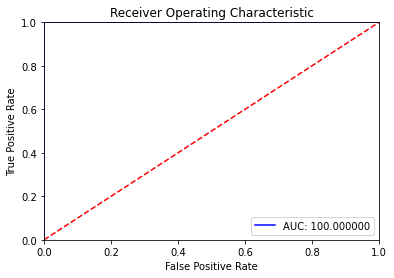

In [60]:
# Receiver Operator Curve for Classification

plt.rcParams["figure.figsize"] = 6, 4

plot_ROC(validation_labels, validation_preds)

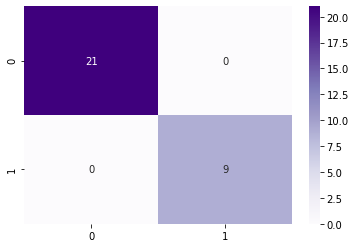

In [61]:
# Confusion Matrix

plt.rcParams["figure.figsize"] = 6, 4
sns.heatmap(metrics.confusion_matrix(validation_labels, validation_preds), 
            annot=True, 
            cmap="Purples")
plt.show()

In [62]:
# Obtain a validation data generator

validation_generator = get_generator(validation_features, validation_labels, batch_size=30)

In [63]:
# Evaluate the model

model.evaluate(validation_generator, return_dict=False);

1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - accuracy: 1.0000


***
<a id="coding_tutorial_3"></a>
## Keras image data augmentation

#### Import the data

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=11Y43ta5gT672L3sfJFR2DvPs-ralY5Pd

You should store these files in Drive for use in this Colab notebook.

In [64]:
# Run this cell to download the files

from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='11Y43ta5gT672L3sfJFR2DvPs-ralY5Pd',
                                    dest_path='/content/flowers-recognition-split.zip',
                                    unzip=True)

Unzipping...Done.


In [65]:
import matplotlib.pyplot as plt
import numpy as np

#### Load the CIFAR-10 Dataset

In [66]:
from tensorflow.keras.datasets import cifar10

In [67]:
# Load the CIFAR-10 dataset

(training_features, training_labels), (test_features, test_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [68]:
# Convert the labels to a one-hot encoding

num_classes = 10

training_labels = tf.keras.utils.to_categorical(training_labels, num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes)

#### Create a generator function

In [69]:
# Create a function that returns a data generator

def get_generator(features, labels, batch_size=1):
    for n in range(int(len(features)/batch_size)):
        yield (features[n*batch_size:(n+1)*batch_size], labels[n*batch_size:(n+1)*batch_size])

In [70]:
# Use the function we created to get a training data generator with a batch size of 1

training_generator = get_generator(training_features, training_labels)

In [71]:
# Assess the shape of the items generated by training_generator using the `next` function to yield an item.

image, label = next(training_generator)
print(image.shape)
print(label.shape)

(1, 32, 32, 3)
(1, 10)


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


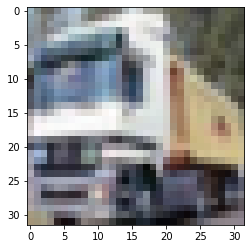

In [72]:
# Test the training generator by obtaining an image using the `next` generator function, and then using imshow to plot it.
# Print the corresponding label

from matplotlib.pyplot import imshow

image, label = next(training_generator)
image_unbatched = image.squeeze(0)
imshow(image_unbatched)
print(label)

In [73]:
# Reset the generator by re-running the `get_generator` function.

train_generator = get_generator(training_features, training_labels)

#### Create a data augmention generator

In [74]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [75]:
# Create a function to convert an image to monochrome

def monochrome(x):
    def func_bw(a):
        average_colour = np.mean(a)
        return [average_colour, average_colour, average_colour]
    x = np.apply_along_axis(func_bw, -1, x)
    return x

In [76]:
# Create an ImageDataGenerator object

image_generator = ImageDataGenerator(preprocessing_function=monochrome, 
                                     rotation_range=30, 
                                     rescale=1/255., 
                                     width_shift_range=0.2, 
                                     height_shift_range=0.2, 
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     vertical_flip=True)

image_generator.fit(training_features)

Check [the documentation](https://keras.io/preprocessing/image/) for the full list of image data augmentation options. 

In [77]:
# Create an iterable generator using the `flow` function

image_generator_iterator = image_generator.flow(training_features, 
                                                training_labels, 
                                                batch_size=1, 
                                                shuffle=False)

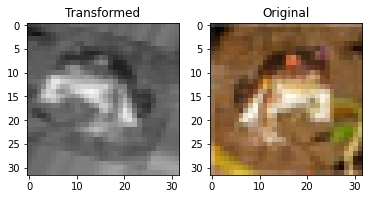

In [78]:
# Show a sample from the generator and compare with the original

image, label = next(image_generator_iterator)
image_orig, label_orig = next(train_generator)
figs, axes = plt.subplots(1,2)
axes[0].imshow(image[0,:,:,:])
axes[0].set_title('Transformed')
axes[1].imshow(image_orig[0,:,:,:])
axes[1].set_title('Original')
plt.show()

#### Flow from directory

In [79]:
# Inspect the directory structure

train_path = '/content/flowers-recognition-split/train'
val_path = '/content/flowers-recognition-split/val'

In [80]:
# Create an ImageDataGenerator object

datagenerator = ImageDataGenerator(rescale=(1/255.0))

In [81]:
classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [82]:
# Create a training data generator

train_generator = datagenerator.flow_from_directory(train_path, batch_size=64, classes=classes, target_size=(64,64))

Found 3027 images belonging to 5 classes.


In [83]:
# Create a validation data generator

validation_generator = datagenerator.flow_from_directory(val_path, batch_size=64, classes=classes, target_size=(64,64))

Found 1296 images belonging to 5 classes.


[0. 0. 0. 0. 1.]


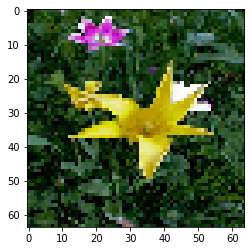

In [84]:
# Get and display an image and label from the training generator

x = next(train_generator)
imshow(x[0][4])
print(x[1][4])

In [85]:
# Reset the training generator

train_generator = datagenerator.flow_from_directory(train_path, batch_size=64, classes=classes, target_size=(64,64))

Found 3027 images belonging to 5 classes.


#### Create a model to train

In [86]:
# Build a CNN model

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, Flatten, Dense

def flower_model():
    model = tf.keras.Sequential()
    model.add(Input((64, 64, 3)))
    model.add(Conv2D(8, (8, 8), padding='same', activation='relu'))
    model.add(MaxPooling2D((4,4)))
    model.add(Conv2D(8, (8, 8), padding='same', activation='relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(4, (4, 4), padding='same', activation='relu'))
    model.add(Flatten())
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(5, activation='softmax'))

    # Create an optimizer object
    optimizer = tf.keras.optimizers.Adam(1e-3)

    # Compile the model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [87]:
# Print the model summary

model = flower_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 8)         1544      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 8)         4104      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 4)           516       
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                4

#### Train the model

In [88]:
# Calculate the training generator and test generator steps per epoch

train_steps_per_epoch = train_generator.n // train_generator.batch_size
val_steps = validation_generator.n // validation_generator.batch_size
print(train_steps_per_epoch, val_steps)

47 20


In [89]:
# Fit the model

model.fit(train_generator, steps_per_epoch=train_steps_per_epoch, epochs=50)

Epoch 1/50
47/47 [==============================] - 7s 146ms/step - loss: 1.5428 - accuracy: 0.2926
Epoch 2/50
47/47 [==============================] - 7s 148ms/step - loss: 1.4321 - accuracy: 0.3483
Epoch 3/50
47/47 [==============================] - 7s 149ms/step - loss: 1.3452 - accuracy: 0.4136
Epoch 4/50
47/47 [==============================] - 7s 148ms/step - loss: 1.2395 - accuracy: 0.4765
Epoch 5/50
47/47 [==============================] - 7s 149ms/step - loss: 1.1404 - accuracy: 0.5292
Epoch 6/50
47/47 [==============================] - 7s 148ms/step - loss: 1.1199 - accuracy: 0.5424
Epoch 7/50
47/47 [==============================] - 7s 149ms/step - loss: 1.0774 - accuracy: 0.5579
Epoch 8/50
47/47 [==============================] - 7s 149ms/step - loss: 1.0354 - accuracy: 0.5818
Epoch 9/50
47/47 [==============================] - 7s 149ms/step - loss: 0.9892 - accuracy: 0.6068
Epoch 10/50
47/47 [==============================] - 7s 150ms/step - loss: 0.9706 - accuracy: 0.6227

#### Evaluate the model

In [90]:
# Evaluate the model

model.evaluate(validation_generator, steps=val_steps, return_dict=False);

20/20 [==============================] - 3s 144ms/step - loss: 1.4656 - accuracy: 0.6008


#### Predict using the generator

In [91]:
# Predict labels with the model

predictions = model.predict(validation_generator, steps=1)

In [92]:
predictions.argmax(axis=1)

array([0, 3, 4, 0, 1, 2, 1, 0, 2, 3, 3, 3, 1, 2, 4, 2, 1, 0, 3, 1, 3, 0,
       0, 4, 2, 2, 3, 2, 4, 0, 3, 1, 3, 0, 3, 2, 0, 0, 2, 4, 0, 4, 0, 4,
       2, 0, 2, 0, 1, 0, 3, 4, 2, 4, 4, 3, 1, 3, 3, 0, 1, 1, 1, 2])

***
<a id="coding_tutorial_4"></a>
## The Dataset Class

#### Import the data

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=1BAjGPFlpqsDdWof50Ng3Fmju5O8F1_uZ

[Single Archive] https://drive.google.com/file/d/1MVADhaSTlbd4h2PbUsAPWdj5i13Je4NJ/view?usp=sharing

You should store these files in Drive for use in this Colab notebook.

In [93]:
# Run this cell to download the files

gdd.download_file_from_google_drive(file_id='1MVADhaSTlbd4h2PbUsAPWdj5i13Je4NJ',
                                    dest_path='/content/shakespeare.zip',
                                    unzip=True)

Unzipping...Done.


In [94]:
import matplotlib.pyplot as plt
import numpy as np
import os

#### Create a simple dataset

In [95]:
x = np.zeros((100,10,2,2))

In [96]:
# Create a dataset from the tensor x

dataset1 = tf.data.Dataset.from_tensor_slices(x)

In [97]:
# Inspect the Dataset object

print(dataset1)
print(dataset1.element_spec)
print(tf.data.experimental.cardinality(dataset1))

<TensorSliceDataset shapes: (10, 2, 2), types: tf.float64>
TensorSpec(shape=(10, 2, 2), dtype=tf.float64, name=None)
tf.Tensor(100, shape=(), dtype=int64)


In [98]:
x2 = [np.zeros((10,2,2)), np.zeros((5,2,2))]

In [99]:
# Try creating a dataset from the tensor x2

dataset2 = tf.data.Dataset.from_tensors_slices(x2)

AttributeError: ignored

In [100]:
x2 = [np.zeros((10,1)), np.zeros((10,1)), np.zeros((10,1))]

In [101]:
# Create another dataset from the new x2 and inspect the Dataset object

dataset2 = tf.data.Dataset.from_tensor_slices(x2)

In [102]:
# Print the element_spec

print(dataset2.element_spec)

TensorSpec(shape=(10, 1), dtype=tf.float64, name=None)


In [103]:
# No of data points in dataset.

print(tf.data.experimental.cardinality(dataset2))

tf.Tensor(3, shape=(), dtype=int64)


#### Create a zipped dataset

In [104]:
# Combine the two datasets into one larger dataset

dataset_zipped = tf.data.Dataset.zip((dataset1, dataset2))

In [105]:
# Print the element_spec

print(dataset_zipped.element_spec)

(TensorSpec(shape=(10, 2, 2), dtype=tf.float64, name=None), TensorSpec(shape=(10, 1), dtype=tf.float64, name=None))


In [106]:
# Define a function to find the number of batches in a dataset

def get_batches(dataset):
    iter_dataset = iter(dataset)
    i = 0
    try:
        while next(iter_dataset):
            i = i+1
    except:
        return i

In [107]:
# Find the number of batches in the zipped Dataset

get_batches(dataset_zipped)

3

In [108]:
# No of data points in Zipped Dataset [Short Method].
# Note: ;arger dataset is trimmmed in size.

print(tf.data.experimental.cardinality(dataset_zipped))

tf.Tensor(3, shape=(), dtype=int64)


#### Create a dataset from numpy arrays

In [109]:
# Load the MNIST dataset

(train_features, train_labels), (test_features, test_labels) = tf.keras.datasets.mnist.load_data()

print(type(train_features), type(train_labels))

11493376/11490434 [==============================] - 0s 0us/step
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [110]:
# Create a Dataset from the MNIST data

mnist_dataset = tf.data.Dataset.from_tensor_slices((train_features, train_labels))

In [111]:
mnist_dataset_T = tf.data.Dataset.from_tensors((train_features, train_labels))

In [112]:
# Inspect the Dataset object

print(mnist_dataset.element_spec)

(TensorSpec(shape=(28, 28), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))


In [113]:
print(mnist_dataset_T.element_spec)

(TensorSpec(shape=(60000, 28, 28), dtype=tf.uint8, name=None), TensorSpec(shape=(60000,), dtype=tf.uint8, name=None))


In [114]:
# Total Number of Data Points

print(tf.data.experimental.cardinality(mnist_dataset))

tf.Tensor(60000, shape=(), dtype=int64)


In [115]:
print(tf.data.experimental.cardinality(mnist_dataset_T))

tf.Tensor(1, shape=(), dtype=int64)


In [116]:
# Inspect the length of an element using the take method

element = next(iter(mnist_dataset.take(1)))

In [117]:
# Examine the shapes of the data

print(element[0].shape)
print(element[1].shape)

(28, 28)
()


In [118]:
element = next(iter(mnist_dataset_T.take(1)))

In [119]:
print(element[0].shape)
print(element[1].shape)

(60000, 28, 28)
(60000,)


#### Create a dataset from text data

In [120]:
# Print the list of text files

text_files = sorted([f.path for f in os.scandir('/content/shakespeare')])

text_files

['/content/shakespeare/tempest.1.1.txt',
 '/content/shakespeare/tempest.1.2.txt',
 '/content/shakespeare/tempest.2.1.txt',
 '/content/shakespeare/tempest.2.2.txt',
 '/content/shakespeare/tempest.3.1.txt',
 '/content/shakespeare/tempest.3.2.txt',
 '/content/shakespeare/tempest.3.3.txt',
 '/content/shakespeare/tempest.4.1.txt',
 '/content/shakespeare/tempest.5.1.txt']

In [121]:
# Load the first file using python and print the first 5 lines.

with open(text_files[0], 'r') as fil:
    contents = [fil.readline() for i in range(5)]
    for line in contents:
        print(line)

SCENE I. On a ship at sea: a tempestuous noise

of thunder and lightning heard.

Enter a Master and a Boatswain



Master



In [122]:
# Load the lines from the files into a dataset using TextLineDataset

shakespeare_dataset = tf.data.TextLineDataset(filenames=text_files)

In [123]:
print(shakespeare_dataset)
print(tf.data.experimental.cardinality(shakespeare_dataset))

<TextLineDatasetV2 shapes: (), types: tf.string>
tf.Tensor(-2, shape=(), dtype=int64)


In [124]:
# Use the take method to get and print the first 5 lines of the dataset

first_5_lines_dataset = iter(shakespeare_dataset.take(5))
lines = [line for line in first_5_lines_dataset]
for line in lines:
    print(line)

tf.Tensor(b'SCENE I. On a ship at sea: a tempestuous noise', shape=(), dtype=string)
tf.Tensor(b'of thunder and lightning heard.', shape=(), dtype=string)
tf.Tensor(b'Enter a Master and a Boatswain', shape=(), dtype=string)
tf.Tensor(b'', shape=(), dtype=string)
tf.Tensor(b'Master', shape=(), dtype=string)


In [125]:
# Compute the number of lines in the first file

lines = []
with open(text_files[0], 'r') as fil:
    line = fil.readline()
    while line:
        lines.append(line)
        line = fil.readline()
    print(len(lines))

121


In [126]:
# Compute the number of lines in the shakespeare dataset we created

shakespeare_dataset_iterator = iter(shakespeare_dataset)
lines = [line for line in shakespeare_dataset_iterator]
print(len(lines))

3134


#### Interleave lines from the text data files

In [127]:
# Create a dataset of the text file strings

text_files_dataset = tf.data.Dataset.from_tensor_slices(text_files)
files = [file for file in text_files_dataset]
for file in files:
    print(file)

tf.Tensor(b'/content/shakespeare/tempest.1.1.txt', shape=(), dtype=string)
tf.Tensor(b'/content/shakespeare/tempest.1.2.txt', shape=(), dtype=string)
tf.Tensor(b'/content/shakespeare/tempest.2.1.txt', shape=(), dtype=string)
tf.Tensor(b'/content/shakespeare/tempest.2.2.txt', shape=(), dtype=string)
tf.Tensor(b'/content/shakespeare/tempest.3.1.txt', shape=(), dtype=string)
tf.Tensor(b'/content/shakespeare/tempest.3.2.txt', shape=(), dtype=string)
tf.Tensor(b'/content/shakespeare/tempest.3.3.txt', shape=(), dtype=string)
tf.Tensor(b'/content/shakespeare/tempest.4.1.txt', shape=(), dtype=string)
tf.Tensor(b'/content/shakespeare/tempest.5.1.txt', shape=(), dtype=string)


In [128]:
# Interleave the lines from the text files

interleaved_shakespeare_dataset = text_files_dataset.interleave(tf.data.TextLineDataset, cycle_length=9)
print(interleaved_shakespeare_dataset.element_spec)

TensorSpec(shape=(), dtype=tf.string, name=None)


In [129]:
# Print the first 10 elements of the interleaved dataset

lines = [line for line in iter(interleaved_shakespeare_dataset.take(10))]
for line in lines:
    print(line)

tf.Tensor(b'SCENE I. On a ship at sea: a tempestuous noise', shape=(), dtype=string)
tf.Tensor(b"SCENE II. The island. Before PROSPERO'S cell.", shape=(), dtype=string)
tf.Tensor(b'SCENE I. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b'SCENE II. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b"SCENE I. Before PROSPERO'S Cell.", shape=(), dtype=string)
tf.Tensor(b'SCENE II. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b'SCENE III. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b"SCENE I. Before PROSPERO'S cell.", shape=(), dtype=string)
tf.Tensor(b"SCENE I. Before PROSPERO'S cell.", shape=(), dtype=string)
tf.Tensor(b'of thunder and lightning heard.', shape=(), dtype=string)


***
<a id="coding_tutorial_5"></a>
## Training with Datasets

In [130]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

#### Load the UCI Bank Marketing Dataset

#### Import the data

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=1cNtP4iDyGhF620ZbmJdmJWYQrRgJTCum

[Single file] https://drive.google.com/file/d/1gmG6Q2-TzbbxTC-Cly2rckAmdunqvAou/view?usp=sharing

You should store these files in Drive for use in this Colab notebook.

In [131]:
# Run this cell to Download the Data

gdd.download_file_from_google_drive(file_id='1gmG6Q2-TzbbxTC-Cly2rckAmdunqvAou',
                                    dest_path='/content/bank.zip',
                                    unzip=True)

Unzipping...Done.


In [132]:
# Load the CSV file into a pandas DataFrame

bank_dataframe = pd.read_csv('/content/bank/bank-full.csv', delimiter=';')

In [133]:
# Show the head of the DataFrame

bank_dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [134]:
# Print the shape of the DataFrame

print(bank_dataframe.shape)

(45211, 17)


In [135]:
# Select features from the DataFrame

features = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
            'loan', 'contact', 'campaign', 'pdays', 'poutcome']
labels = ['y']

bank_dataframe = bank_dataframe.filter(features + labels)

In [136]:
# Show the head of the DataFrame

bank_dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,1,-1,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,1,-1,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,1,-1,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,1,-1,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,1,-1,unknown,no


#### Preprocess the data

In [137]:
# Convert the categorical features in the DataFrame to one-hot encodings

categorical_features = ['default', 'housing', 'job', 'loan', 'education', 'contact', 'poutcome']

for feature in categorical_features:
    bank_dataframe = pd.get_dummies(bank_dataframe, prefix=feature, columns=[feature])

In [138]:
# Show the head of the DataFrame

bank_dataframe.head()

,age,marital,balance,campaign,pdays,y,default_no,default_yes,housing_no,housing_yes,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,loan_no,loan_yes,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,married,2143,1,-1,no,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,single,29,1,-1,no,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
2,33,married,2,1,-1,no,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
3,47,married,1506,1,-1,no,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,single,1,1,-1,no,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1


In [139]:
# Shuffle the DataFrame

bank_dataframe = bank_dataframe.sample(frac=1).reset_index(drop=True)

#### Create the Dataset object

In [140]:
# Convert the DataFrame to a Dataset

bank_dataset = tf.data.Dataset.from_tensor_slices(dict(bank_dataframe))

In [141]:
# Inspect the Dataset object

bank_dataset.element_spec

{'age': TensorSpec(shape=(), dtype=tf.int64, name=None),
 'balance': TensorSpec(shape=(), dtype=tf.int64, name=None),
 'campaign': TensorSpec(shape=(), dtype=tf.int64, name=None),
 'contact_cellular': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'contact_telephone': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'contact_unknown': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'default_no': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'default_yes': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'education_primary': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'education_secondary': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'education_tertiary': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'education_unknown': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'housing_no': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'housing_yes': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'job_admin.': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 

#### Filter the Dataset

In [142]:
# First check that there are records in the dataset for non-married individuals

def check_divorced():
    bank_dataset_iterable = iter(bank_dataset)
    for x in bank_dataset_iterable:
        if x['marital'] != 'divorced':
            print('Found a person with marital status: {}'.format(x['marital']))
            return
    print('No non-divorced people were found!')

check_divorced()

Found a person with marital status: b'married'


In [143]:
# Filter the Dataset to retain only entries with a 'divorced' marital status

bank_dataset = bank_dataset.filter(lambda x : tf.equal(x['marital'], tf.constant([b'divorced']))[0] )

In [144]:
# Check the records in the dataset again

check_divorced()

No non-divorced people were found!


#### Map a function over the dataset

In [145]:
# Convert the label ('y') to an integer instead of 'yes' or 'no'

def map_label(x):
    x["y"] = 0 if (x["y"] == tf.constant([b"no"], dtype=tf.string)) else 1
    return x

bank_dataset = bank_dataset.map(map_label)

In [146]:
# Inspect the Dataset object

bank_dataset.element_spec

{'age': TensorSpec(shape=(), dtype=tf.int64, name=None),
 'balance': TensorSpec(shape=(), dtype=tf.int64, name=None),
 'campaign': TensorSpec(shape=(), dtype=tf.int64, name=None),
 'contact_cellular': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'contact_telephone': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'contact_unknown': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'default_no': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'default_yes': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'education_primary': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'education_secondary': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'education_tertiary': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'education_unknown': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'housing_no': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'housing_yes': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'job_admin.': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 

In [147]:
# Remove the 'marital' column

bank_dataset = bank_dataset.map(lambda x: {key:value for key,value in x.items() if key!="marital"})

In [148]:
# Inspect the Dataset object

bank_dataset.element_spec

{'age': TensorSpec(shape=(), dtype=tf.int64, name=None),
 'balance': TensorSpec(shape=(), dtype=tf.int64, name=None),
 'campaign': TensorSpec(shape=(), dtype=tf.int64, name=None),
 'contact_cellular': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'contact_telephone': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'contact_unknown': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'default_no': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'default_yes': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'education_primary': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'education_secondary': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'education_tertiary': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'education_unknown': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'housing_no': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'housing_yes': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'job_admin.': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 

#### Create input and output data tuples

In [149]:
X_COLS = list(bank_dataset.element_spec.keys())
X_COLS.remove('y')
Y_COLS = ['y']

In [150]:
# Create an input and output tuple for the dataset

def map_feature_label(x):
    features = tuple([[tf.cast(x[idx], tf.int32)] for idx in X_COLS])
    return (tf.concat(features, axis=0), x['y'])

In [151]:
# Map this function over the dataset

bank_dataset = bank_dataset.map(map_feature_label)

In [152]:
# Inspect the Dataset object

bank_dataset

<MapDataset shapes: ((33,), ()), types: (tf.int32, tf.int32)>

#### Split into a training and a validation set

In [153]:
# Determine the length of the Dataset

dataset_length = 0
for _ in bank_dataset:
    dataset_length += 1
print(dataset_length)

5207


In [154]:
# Make training and validation sets from the dataset

training_elements = int(dataset_length*0.7)

train_dataset = bank_dataset.take(training_elements)
valid_dataset = bank_dataset.skip(training_elements)

#### Build a classification model

Now let's build a model to classify the features.

In [155]:
# Build a classifier model

from tensorflow.keras.layers import Dense, Input, Concatenate, BatchNormalization
from tensorflow.keras import Sequential

def bank_model():
    model = Sequential()
    model.add(Input(shape=(33,)))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(400, activation='relu'))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(400, activation='relu'))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model

    optimizer = tf.keras.optimizers.Adam(1e-4)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [156]:
# Show the model summary

model = bank_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_2 (Batch (None, 33)                132       
_________________________________________________________________
dense_5 (Dense)              (None, 400)               13600     
_________________________________________________________________
batch_normalization_3 (Batch (None, 400)               1600      
_________________________________________________________________
dense_6 (Dense)              (None, 400)               160400    
_________________________________________________________________
batch_normalization_4 (Batch (None, 400)               1600      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 401       
Total params: 177,733
Trainable params: 176,067
Non-trainable params: 1,666
____________________________________________

#### Train the model

In [157]:
# Create batched training and validation datasets

train_dataset = train_dataset.batch(100)
valid_dataset = valid_dataset.batch(100)

In [158]:
# Shuffle the training data

train_dataset = train_dataset.shuffle(1000)

In [159]:
# Fit the model

history = model.fit(train_dataset, validation_data=valid_dataset, epochs=20, verbose=2)

Epoch 1/20
37/37 - 3s - loss: 0.7262 - accuracy: 0.5738 - val_loss: 0.7017 - val_accuracy: 0.6052
Epoch 2/20
37/37 - 3s - loss: 0.6328 - accuracy: 0.7031 - val_loss: 0.6375 - val_accuracy: 0.6967
Epoch 3/20
37/37 - 3s - loss: 0.5839 - accuracy: 0.7607 - val_loss: 0.6102 - val_accuracy: 0.7633
Epoch 4/20
37/37 - 3s - loss: 0.5442 - accuracy: 0.8085 - val_loss: 0.5823 - val_accuracy: 0.7799
Epoch 5/20
37/37 - 3s - loss: 0.5127 - accuracy: 0.8370 - val_loss: 0.5407 - val_accuracy: 0.8138
Epoch 6/20
37/37 - 3s - loss: 0.4788 - accuracy: 0.8628 - val_loss: 0.5267 - val_accuracy: 0.8202
Epoch 7/20
37/37 - 3s - loss: 0.4498 - accuracy: 0.8782 - val_loss: 0.5144 - val_accuracy: 0.8311
Epoch 8/20
37/37 - 3s - loss: 0.4252 - accuracy: 0.8949 - val_loss: 0.4681 - val_accuracy: 0.8439
Epoch 9/20
37/37 - 3s - loss: 0.4017 - accuracy: 0.8982 - val_loss: 0.4619 - val_accuracy: 0.8522
Epoch 10/20
37/37 - 3s - loss: 0.3793 - accuracy: 0.9034 - val_loss: 0.4462 - val_accuracy: 0.8573
Epoch 11/20
37/37 -

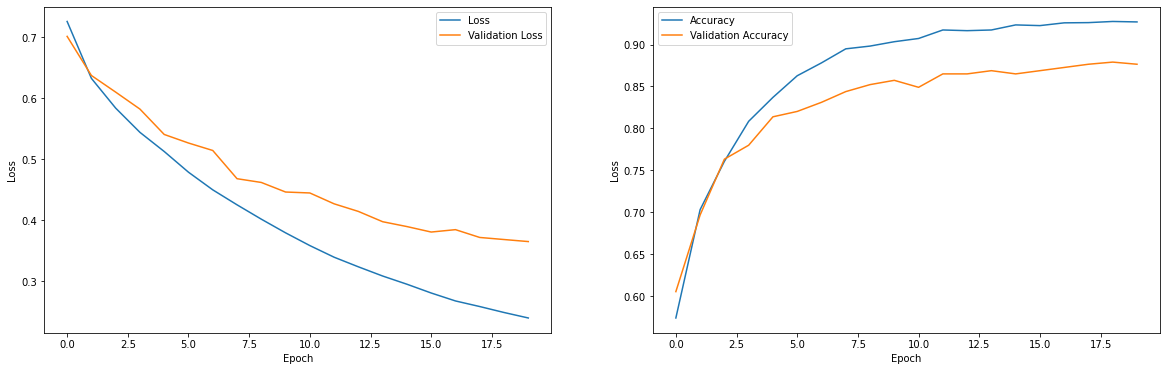

In [160]:
# Plot the training and validation accuracy

plt.rcParams["figure.figsize"] = 20, 6

plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")


plt.show()